In [72]:
import pandas as pd

In [73]:
car1 = pd.read_csv(".\\전처리완료 데이터\\서울시교통1월.csv", encoding='utf-8')
car2 = pd.read_csv(".\\전처리완료 데이터\\서울시교통2월.csv", encoding='utf-8')
car3 = pd.read_csv(".\\전처리완료 데이터\\서울시교통3월.csv", encoding='utf-8')
car4 = pd.read_csv(".\\전처리완료 데이터\\서울시교통4월.csv", encoding='utf-8')
car5 = pd.read_csv(".\\전처리완료 데이터\\서울시교통5월.csv", encoding='utf-8')
car6 = pd.read_csv(".\\전처리완료 데이터\\서울시교통6월.csv", encoding='utf-8')

b1 = pd.read_csv(".\\전처리완료 데이터\\서울시버스1월.csv", encoding='utf-8')
b2 = pd.read_csv(".\\전처리완료 데이터\\서울시버스2월.csv", encoding='utf-8')
b3 = pd.read_csv(".\\전처리완료 데이터\\서울시버스3월.csv", encoding='utf-8')
b4 = pd.read_csv(".\\전처리완료 데이터\\서울시버스4월.csv", encoding='utf-8')
b5 = pd.read_csv(".\\전처리완료 데이터\\서울시버스5월.csv", encoding='utf-8')
b6 = pd.read_csv(".\\전처리완료 데이터\\서울시버스6월.csv", encoding='utf-8')

s1 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철1월.csv", encoding='utf-8')
s2 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철2월.csv", encoding='utf-8')
s3 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철3월.csv", encoding='utf-8')
s4 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철4월.csv", encoding='utf-8')
s5 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철5월.csv", encoding='utf-8')
s6 = pd.read_csv(".\\전처리완료 데이터\\서울시지하철6월.csv", encoding='utf-8')





In [74]:
scar=pd.concat([car1,car2,car3,car4,car5,car6])
sbus=pd.concat([b1,b2,b3,b4,b5,b6])
ssub=pd.concat([s1,s2,s3,s4,s5,s6])

scar.drop('Unnamed: 0',axis=1,inplace=True)
sbus.drop('Unnamed: 0',axis=1,inplace=True)
ssub.drop('Unnamed: 0',axis=1,inplace=True)


#scar.head()
sbus=sbus[0::2]
ssub=ssub[0::2]

In [75]:
len(sbus['버스승차량평균'].unique())
len(sbus['버스승차량평균'])

182

In [76]:
t1=pd.merge(scar,sbus,on='일자', how='outer')
t2=pd.merge(t1,ssub,on='일자', how='outer')
t2.head()
t2.duplicated().value_counts()

False    182
dtype: int64

In [77]:
he = pd.read_csv(".\\전처리완료 데이터\\열지수전월.csv", encoding='utf-8')
mu = pd.read_csv(".\\전처리완료 데이터\\서울시먼지.csv", encoding='utf-8')
mo = pd.read_csv(".\\전처리완료 데이터\\모기전월.csv", encoding='utf-8')
ra = pd.read_csv(".\\전처리완료 데이터\\강수량전월.csv", encoding='utf-8')

he.drop('Unnamed: 0',axis=1,inplace=True)
mu.drop('Unnamed: 0',axis=1,inplace=True)
mo.drop('Unnamed: 0',axis=1,inplace=True)
ra.drop('Unnamed: 0',axis=1,inplace=True)
mu=mu[0::2]


In [78]:
e1=pd.merge(he,mu,on='일자', how='outer')
e2=pd.merge(e1,mo,on='일자', how='outer')
e3=pd.merge(e2,ra,on='일자', how='outer')


data=pd.merge(t2,e3,on='일자', how='outer')

data.tail(10)

mo.duplicated().value_counts()
mo['통합모기지수']=mo[[ '모기지수(수변부)','모기지수(주거지)', '모기지수(공원)']].sum()/3


In [79]:
#import datetime
#data1=datetime.datetime.strptime(data['일자'],"Y%m%d").date()

In [80]:
data.head()

,일자,유입량평균,유출량평균,버스승차량평균,버스하차량평균,지하철승차량평균,지하철하차량평균,기온(°C),기온(°F),습도(%),열지수,m_dust,m_mcrodust,모기지수(수변부),모기지수(주거지),모기지수(공원),강수량(mm)
0,20200101,658.291667,648.500000,70.666667,68.541667,7794.666667,7760.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20200102,807.833333,798.208333,141.875000,138.208333,17413.750000,17417.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20200103,861.458333,849.875000,150.625000,146.875000,18567.625000,18573.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200104,807.208333,801.333333,116.458333,113.375000,14158.416667,14140.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200105,698.208333,683.833333,89.916667,87.833333,10420.541667,10369.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
tm = pd.read_csv(".\\Time.csv")
tm['confirmed_lag']=tm['confirmed'].shift(1)
tm['신규확진자수']=tm['confirmed']- tm['confirmed_lag']
tm.rename(columns={'date':'일자'},inplace=True)


for i in range(len(tm.index)):
    tm['일자'][i]=tm['일자'][i].replace('-','')

#tm=tm.replace('-','')

#tm.rename(columns={'date':'일자'},inplace=True)

#tm['일자'].replace('-','')
#tm['일자'].fillna(0)

tm.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,일자,time,test,negative,confirmed,released,deceased,confirmed_lag,신규확진자수
0,20200120,16,1,0,1,0,0,NaN,NaN
1,20200121,16,1,0,1,0,0,1.0,0.0
2,20200122,16,4,3,1,0,0,1.0,0.0
3,20200123,16,22,21,1,0,0,1.0,0.0
4,20200124,16,27,25,2,0,0,1.0,1.0


In [82]:
#tm['date'].replace('-','')
tm['일자']=pd.to_numeric(tm['일자'], errors='coerce')

#tm.rename(columns={'date':'일자'},inplace=True)
#tm.head()
tm.dtypes
tm1=tm[['일자','신규확진자수']]

In [83]:
data1=pd.merge(data,tm1,on='일자', how='outer')


In [84]:
data2=data1[19:255]
data2.head()

,일자,유입량평균,유출량평균,버스승차량평균,버스하차량평균,지하철승차량평균,지하철하차량평균,기온(°C),기온(°F),습도(%),열지수,m_dust,m_mcrodust,모기지수(수변부),모기지수(주거지),모기지수(공원),강수량(mm),신규확진자수
19,20200120,857.416667,861.208333,102.041667,99.333333,12484.041667,12363.416667,1.0,33.8,49.5,0.98,45.083333,26.166667,5.5,5.5,5.5,0.0,NaN
20,20200121,879.958333,880.291667,151.083333,146.916667,17537.250000,17558.625000,-0.6,30.9,37.3,-0.64,44.833333,27.041667,5.5,5.5,5.5,0.0,0.0
21,20200122,887.041667,888.916667,156.416667,152.333333,18894.750000,18886.916667,2.8,37.0,35.9,2.76,54.625000,35.333333,5.5,5.5,5.5,0.0,0.0
22,20200123,855.458333,870.958333,154.083333,150.250000,17863.500000,17827.791667,4.6,40.2,47.6,4.58,66.250000,45.083333,5.5,5.5,5.5,0.0,0.0
23,20200124,679.666667,698.875000,143.125000,139.666667,16980.000000,16749.875000,3.0,37.4,62.7,2.98,61.458333,44.750000,5.5,5.5,5.5,0.0,1.0


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib 패키지 한글 설정 시작
from matplotlib import rc
rc('font', family='Malgun Gothic')
#matplotlib 패키지 한글 설정 끝


In [86]:
#data2.info

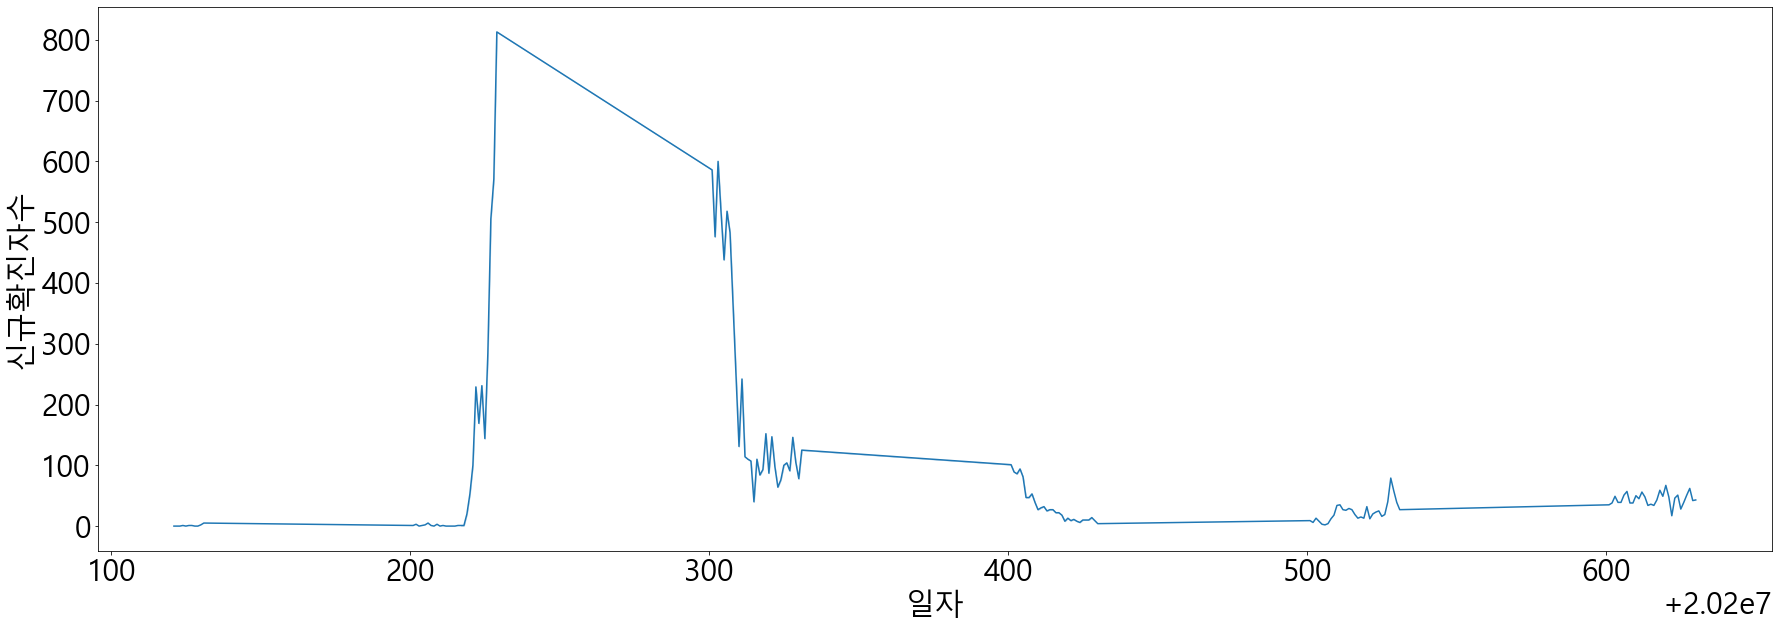

In [87]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,10) # (가로, 세로)

plt.rcParams.update({'font.size': 30}) # 글자 크기
sns.lineplot(x='일자', y='신규확진자수', data=data2)
plt.show()


In [88]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

In [89]:
data2['일자'] = pd.to_datetime(data2.일자, format='%Y%m%d')
data2 = data2.set_index('일자')
data2.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,유입량평균,유출량평균,버스승차량평균,버스하차량평균,지하철승차량평균,지하철하차량평균,기온(°C),기온(°F),습도(%),열지수,m_dust,m_mcrodust,모기지수(수변부),모기지수(주거지),모기지수(공원),강수량(mm),신규확진자수
일자,,,,,,,,,,,,,,,,,
2020-01-20,857.416667,861.208333,102.041667,99.333333,12484.041667,12363.416667,1.0,33.8,49.5,0.98,45.083333,26.166667,5.5,5.5,5.5,0.0,NaN
2020-01-21,879.958333,880.291667,151.083333,146.916667,17537.250000,17558.625000,-0.6,30.9,37.3,-0.64,44.833333,27.041667,5.5,5.5,5.5,0.0,0.0
2020-01-22,887.041667,888.916667,156.416667,152.333333,18894.750000,18886.916667,2.8,37.0,35.9,2.76,54.625000,35.333333,5.5,5.5,5.5,0.0,0.0
2020-01-23,855.458333,870.958333,154.083333,150.250000,17863.500000,17827.791667,4.6,40.2,47.6,4.58,66.250000,45.083333,5.5,5.5,5.5,0.0,0.0
2020-01-24,679.666667,698.875000,143.125000,139.666667,16980.000000,16749.875000,3.0,37.4,62.7,2.98,61.458333,44.750000,5.5,5.5,5.5,0.0,1.0
2020-01-25,740.791667,745.166667,52.875000,51.458333,6171.291667,6188.875000,4.3,39.8,61.3,4.34,41.000000,29.583333,5.5,5.5,5.5,0.0,0.0
2020-01-26,663.750000,635.708333,69.250000,67.625000,7970.958333,8099.041667,5.3,41.5,57.6,5.29,22.791667,15.250000,5.5,5.5,5.5,0.0,1.0
2020-01-27,625.583333,605.500000,72.666667,70.875000,8323.708333,8407.333333,6.0,42.8,47.4,6.01,11.375000,5.000000,5.5,5.5,5.5,0.1,1.0
2020-01-28,799.333333,789.125000,130.791667,127.208333,15652.458333,15675.166667,6.9,44.3,50.5,6.86,13.541667,6.666667,5.5,5.5,5.5,0.0,0.0


In [90]:
data2.isnull().sum()

유입량평균         0
유출량평균         0
버스승차량평균       0
버스하차량평균       0
지하철승차량평균      0
지하철하차량평균      0
기온(°C)        0
기온(°F)        0
습도(%)         0
열지수           0
m_dust        4
m_mcrodust    4
모기지수(수변부)     1
모기지수(주거지)     1
모기지수(공원)      1
강수량(mm)       0
신규확진자수        1
dtype: int64

In [91]:
data2.duplicated().value_counts()
# 69 모기지수때문에 그럼 1월이라 모기가 살수없는 환경이라 동일하게 나옴.

False    167
True      69
dtype: int64

In [92]:
#data2.fillna(0)
data2.isnull().sum()


유입량평균         0
유출량평균         0
버스승차량평균       0
버스하차량평균       0
지하철승차량평균      0
지하철하차량평균      0
기온(°C)        0
기온(°F)        0
습도(%)         0
열지수           0
m_dust        4
m_mcrodust    4
모기지수(수변부)     1
모기지수(주거지)     1
모기지수(공원)      1
강수량(mm)       0
신규확진자수        1
dtype: int64

In [93]:
data2['통합모기지수']=(data2['모기지수(수변부)']+data2['모기지수(주거지)']+data2['모기지수(공원)'])/3
data2['통합먼지지수']=(data2['m_dust']+data2['m_mcrodust'])/2

In [94]:
data2.isnull().sum()
data2[['통합모기지수','통합먼지지수']]

,통합모기지수,통합먼지지수
일자,,
2020-01-20,5.500000,35.625000
2020-01-21,5.500000,35.937500
2020-01-22,5.500000,44.979167
2020-01-23,5.500000,55.666667
2020-01-24,5.500000,53.104167
2020-01-25,5.500000,35.291667
2020-01-26,5.500000,19.020833
2020-01-27,5.500000,8.187500
2020-01-28,5.500000,10.104167


In [95]:
data2['신규확진자수'].fillna(0)
data2.dtypes

유입량평균         float64
유출량평균         float64
버스승차량평균       float64
버스하차량평균       float64
지하철승차량평균      float64
지하철하차량평균      float64
기온(°C)        float64
기온(°F)        float64
습도(%)         float64
열지수           float64
m_dust        float64
m_mcrodust    float64
모기지수(수변부)     float64
모기지수(주거지)     float64
모기지수(공원)      float64
강수량(mm)       float64
신규확진자수        float64
통합모기지수        float64
통합먼지지수        float64
dtype: object

In [96]:
# 표준화
import pandas as pd

#from sklearn.preprocessing import MinMaxScaler

#features = ['유입량평균', '유출량평균', '버스승차량평균', '버스하차량평균', '지하철승차량평균',
         #'지하철하차량평균',
      # '기온(°C)', '기온(°F)', '습도(%)', '열지수', 'm_dust', 'm_mcrodust', '모기지수(수변부)',
      # '모기지수(주거지)', '모기지수(공원)', '강수량(mm)','신규확진자수'] # 표준화하고 싶은 컬럼 넣으면됨.
#scaler = MinMaxScaler()
#data2[:] = scaler.fit_transform(data2[:])
#data2.head()
#data2.to_csv(".\\dataset1.csv",encoding='utf-8-sig')

In [97]:
data2.head()

,유입량평균,유출량평균,버스승차량평균,버스하차량평균,지하철승차량평균,지하철하차량평균,기온(°C),기온(°F),습도(%),열지수,m_dust,m_mcrodust,모기지수(수변부),모기지수(주거지),모기지수(공원),강수량(mm),신규확진자수,통합모기지수,통합먼지지수
일자,,,,,,,,,,,,,,,,,,,
2020-01-20,857.416667,861.208333,102.041667,99.333333,12484.041667,12363.416667,1.0,33.8,49.5,0.98,45.083333,26.166667,5.5,5.5,5.5,0.0,NaN,5.5,35.625000
2020-01-21,879.958333,880.291667,151.083333,146.916667,17537.250000,17558.625000,-0.6,30.9,37.3,-0.64,44.833333,27.041667,5.5,5.5,5.5,0.0,0.0,5.5,35.937500
2020-01-22,887.041667,888.916667,156.416667,152.333333,18894.750000,18886.916667,2.8,37.0,35.9,2.76,54.625000,35.333333,5.5,5.5,5.5,0.0,0.0,5.5,44.979167
2020-01-23,855.458333,870.958333,154.083333,150.250000,17863.500000,17827.791667,4.6,40.2,47.6,4.58,66.250000,45.083333,5.5,5.5,5.5,0.0,0.0,5.5,55.666667
2020-01-24,679.666667,698.875000,143.125000,139.666667,16980.000000,16749.875000,3.0,37.4,62.7,2.98,61.458333,44.750000,5.5,5.5,5.5,0.0,1.0,5.5,53.104167


In [98]:
app=pd.read_csv(".\\apple.csv", encoding='utf-8')
app.drop('Unnamed: 0',axis=1,inplace=True)

app.rename(columns={'date':'일자'}, inplace=True)
app.head()

,일자,walking,driving,cnt
0,2020-01-13,100.00,100.00,NaN
1,2020-01-14,101.26,98.53,NaN
2,2020-01-15,104.37,101.94,NaN
3,2020-01-16,109.61,108.13,NaN
4,2020-01-17,128.68,122.17,NaN


In [99]:
app['일자'] = pd.to_datetime(app.일자, format='%Y-%m-%d')
app = app.set_index('일자')

In [100]:
data2['신규확진자수'].fillna(0)
data3=pd.merge(data2,app,on='일자')

In [101]:
# 새로운 변수만들기
#data3=data2
#data3['통합모기지수']=data2[[ '모기지수(수변부)','모기지수(주거지)', '모기지수(공원)']].sum()/3
#data3['통합먼지지수']=data2[[ 'm_dust', 'm_mcrodust']].sum()/2


data4=data3[['유입량평균', '유출량평균', '버스승차량평균', '버스하차량평균', '지하철승차량평균',
    '지하철하차량평균','기온(°C)', '습도(%)', '열지수', '통합먼지지수', '통합모기지수',
    '강수량(mm)','신규확진자수','walking','driving']]

data4.to_csv(".\\dataset(raw).csv",encoding='utf-8-sig')

In [102]:
#data3.isnull().sum()
data4

,유입량평균,유출량평균,버스승차량평균,버스하차량평균,지하철승차량평균,지하철하차량평균,기온(°C),습도(%),열지수,통합먼지지수,통합모기지수,강수량(mm),신규확진자수,walking,driving
일자,,,,,,,,,,,,,,,
2020-01-20,857.416667,861.208333,102.041667,99.333333,12484.041667,12363.416667,1.0,49.5,0.98,35.625000,5.500000,0.0,NaN,108.11,108.45
2020-01-21,879.958333,880.291667,151.083333,146.916667,17537.250000,17558.625000,-0.6,37.3,-0.64,35.937500,5.500000,0.0,0.0,104.40,105.33
2020-01-22,887.041667,888.916667,156.416667,152.333333,18894.750000,18886.916667,2.8,35.9,2.76,44.979167,5.500000,0.0,0.0,100.02,112.78
2020-01-23,855.458333,870.958333,154.083333,150.250000,17863.500000,17827.791667,4.6,47.6,4.58,55.666667,5.500000,0.0,0.0,102.91,134.89
2020-01-24,679.666667,698.875000,143.125000,139.666667,16980.000000,16749.875000,3.0,62.7,2.98,53.104167,5.500000,0.0,1.0,103.55,132.50
2020-01-25,740.791667,745.166667,52.875000,51.458333,6171.291667,6188.875000,4.3,61.3,4.34,35.291667,5.500000,0.0,0.0,112.88,133.36
2020-01-26,663.750000,635.708333,69.250000,67.625000,7970.958333,8099.041667,5.3,57.6,5.29,19.020833,5.500000,0.0,1.0,105.85,119.25
2020-01-27,625.583333,605.500000,72.666667,70.875000,8323.708333,8407.333333,6.0,47.4,6.01,8.187500,5.500000,0.1,1.0,100.29,101.94
2020-01-28,799.333333,789.125000,130.791667,127.208333,15652.458333,15675.166667,6.9,50.5,6.86,10.104167,5.500000,0.0,0.0,103.57,97.54
